In [1]:
import osmnx as ox, networkx as nx, pandas as pd, geopandas as gpd, time, matplotlib.pyplot as plt, math, ast, re
import statsmodels.api as sm
from geopy.distance import great_circle
from shapely.geometry import Polygon
%matplotlib inline
ox.config(use_cache=True, log_file=True, log_console=True, log_filename='analyze_stats_every_us_urban_area',
          data_folder='G:/Geoff/osmnx/urbanized-areas-usa', cache_folder='G:/Geoff/osmnx/cache')

In [17]:
df = pd.read_csv('usa_stats.csv', encoding='utf-8')
len(df)

497

In [3]:
df['city'] = df['name'].map(lambda x: re.findall(r'^[a-z A-Z\s\.]*', x)[0])

In [5]:
df['streets_per_node_proportion'] = [ast.literal_eval(p) for p in df['streets_per_node_proportion']]

## Plot distribution of intersection types for 9 cities

In [6]:
names = ['Detroit', 'Lubbock', 'Chattanooga', 'Duluth', 'New Orleans', 'Phoenix',
         'Boston', 'Atlanta', 'Chicago']
stats_plot = df[df['city'].isin(names)]
stats_plot = stats_plot.sort_values('area', ascending=False)
stats_plot['city']

1          Atlanta
2          Chicago
4           Boston
8          Detroit
11         Phoenix
67     Chattanooga
80     New Orleans
188        Lubbock
256         Duluth
Name: city, dtype: object

In [7]:
proportion_streets_per_intersection = stats_plot['streets_per_node_proportion'].tolist()
names_full = stats_plot['name'].tolist()
names = [re.findall(r'^[a-zA-Z\s]*', name)[0] for name in names_full]

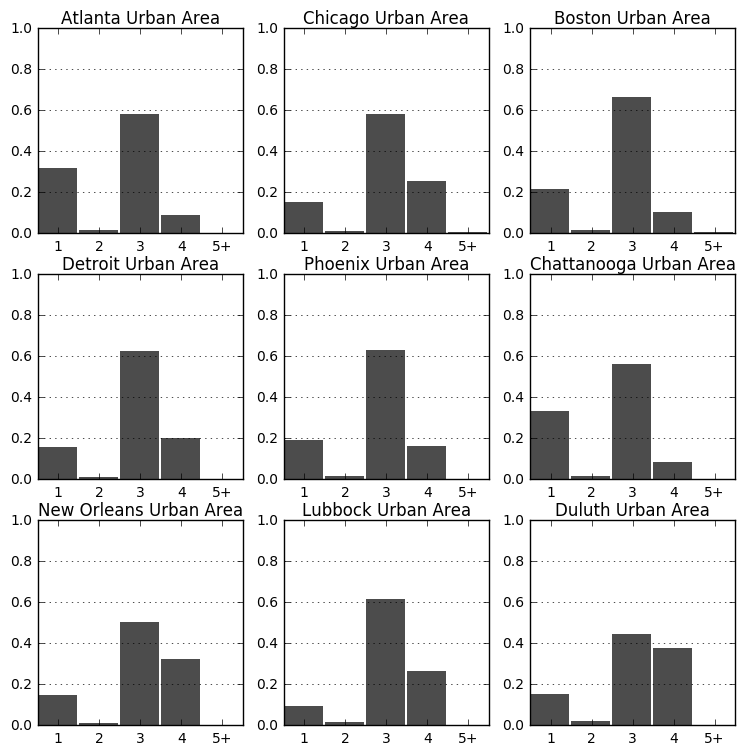

In [8]:
n = len(proportion_streets_per_intersection)
cols = 3
rows = int(n / cols)
max_value = 4
fig, axes = plt.subplots(rows, cols, figsize=(9, 9))
for i, (prop, name) in enumerate(zip(proportion_streets_per_intersection, names)):
    
    row = math.floor(i / cols)
    col = i % cols
    ax = axes[row][col]
    
    all_others = sum(list(prop.values())[max_value + 1:])
    prop = {key:value for key, value in prop.items() if key <= max_value}
    prop[max_value + 1] = all_others
    lefts = [x - 0.5 for x in prop.keys()]
    
    ax.bar(left=lefts, height=prop.values(), width=0.95, alpha=0.7,
           color='k', linewidth=0)
    ax.yaxis.grid(True)
    xticklabels = list(range(0, max_value + 1)) + ['{}+'.format(max_value + 1)]
    ax.set_xticklabels(xticklabels)
    
    ax.set_title('{} Urban Area'.format(name), fontsize=12, y=0.99)
    ax.set_xlim(0.5, max_value + 1.5)
    ax.set_ylim(0, 1)

In [9]:
# which cities have high proportion of cul-de-sacs
prop = df['streets_per_node_proportion'].tolist()
df.loc[pd.DataFrame(prop, index=df.index).sort_values(1, ascending=False).head(20).index]['name']

87     Aguadilla--Isabela--San Sebastián, PR Urbanize...
191    San Germán--Cabo Rojo--Sabana Grande, PR Urban...
219                           Arecibo, PR Urbanized Area
357      Florida--Imbéry--Barceloneta, PR Urbanized Area
367                           Midland, MI Urbanized Area
17                           San Juan, PR Urbanized Area
313                          Mayagüez, PR Urbanized Area
343                        Juana Díaz, PR Urbanized Area
236                     Santa Clarita, CA Urbanized Area
297           Westminster--Eldersburg, MD Urbanized Area
354                             Yauco, PR Urbanized Area
335    Lexington Park--California--Chesapeake Ranch E...
226                        Marysville, WA Urbanized Area
398    Kailua (Honolulu County)--Kaneohe, HI Urbanize...
67                    Chattanooga, TN--GA Urbanized Area
143                         Bremerton, WA Urbanized Area
259                         Los Lunas, NM Urbanized Area
96                            C

In [10]:
df.sort_values(by='circuity_avg', ascending=True).head()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,edge_density_km,...,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,time,city
318,137141203,137.141203,3.236835,0.030722,1.023909,0.022868,0.001015,5547,0.000972,19810.535721,...,0.000636,10548.638904,148.588027,1.446653e+06,9736,3.123596,"{0: 9, 1: 674, 2: 134, 3: 3147, 4: 2254, 5: 11...","{0: 0.0014446227929373998, 1: 0.10818619582664...",4.873442,Midland
292,152630919,152.630919,3.238556,0.029850,1.026418,0.028539,0.002454,5531,0.001001,19062.158308,...,0.000749,9790.403435,157.828293,1.494318e+06,9468,3.096384,"{0: 18, 1: 562, 2: 212, 3: 3344, 4: 1971, 5: 4}","{0: 0.0029455081001472753, 1: 0.09196530846015...",4.418135,Odessa
188,249860381,249.860381,3.061863,0.039490,1.032750,0.030546,0.000951,16303,0.000321,24808.079054,...,0.001018,13515.915970,122.141557,3.377092e+06,27649,3.066652,"{0: 19, 1: 1697, 2: 318, 3: 11109, 4: 4804, 5:...","{0: 0.001054442532881958, 1: 0.094178367278983...",13.290417,Lubbock
228,210823472,210.823472,3.222593,0.037569,1.034604,0.024726,0.000363,12770,0.000443,24242.545885,...,0.001463,12876.212062,122.246588,2.714608e+06,22206,3.206246,"{0: 18, 1: 1045, 2: 257, 3: 7285, 4: 5205, 5: ...","{0: 0.0013012361743656475, 1: 0.07554398901178...",10.096168,Amarillo
283,160423274,160.423274,3.003879,0.129425,1.035577,0.038410,0.002402,2818,0.001559,11362.450516,...,0.002776,5833.523487,194.762318,9.358329e+05,4805,2.764926,"{0: 9, 1: 640, 2: 185, 3: 1962, 4: 665, 5: 6}","{0: 0.0025959042399769255, 1: 0.18459763484280...",2.641833,Vineland


In [11]:
# filter df for outliers in some column
#col = 'node_count'
stats_plot = df#[df[col] < 100000]
print('Threw out {} greatest {} outliers'.format(len(df)-len(stats_plot), col))

Threw out 0 greatest 2 outliers


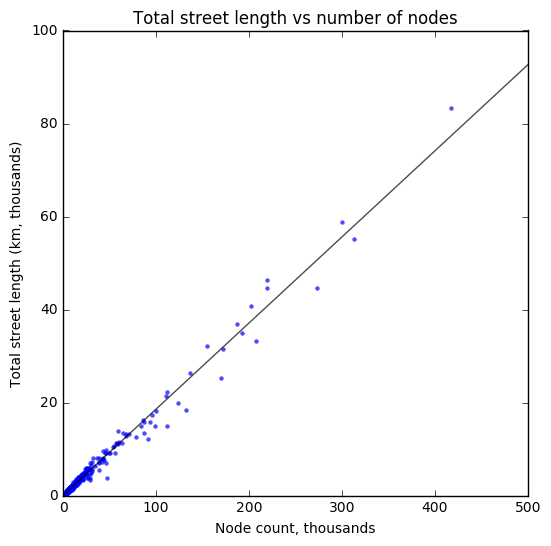

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
x = stats_plot['n'] / 1000
y = stats_plot['street_length_total'] / 1000 / 1000

xlim = [0, math.ceil(x.max()/100)*100] #round to nearest greater 100
ylim = [0, math.ceil(y.max()/20)*20] #round to nearest greater 20

# regress y on x
results = sm.OLS(y, sm.add_constant(x)).fit()

# calculate estimated y values for regression line
x_line = pd.Series(xlim)
y_est = x_line * results.params[1] + results.params[0]

# draw regression line and scatter plot the points
ax.plot(x_line, y_est, c='k', alpha=0.7, linewidth=1, zorder=1)
ax.scatter(x=x, y=y, c='b', linewidths=0, alpha=0.7, s=10)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
#ax.set_xlim((0,15000))
#ax.set_ylim((0,3000))

ax.set_title('Total street length vs number of nodes')
ax.set_xlabel('Node count, thousands')
ax.set_ylabel('Total street length (km, thousands)')

fig.savefig(filename='images/usa-ua-street-length-vs-nodes', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
print(results.rsquared)
results.params

0.984374579549


const    0.066976
n        0.185244
dtype: float64

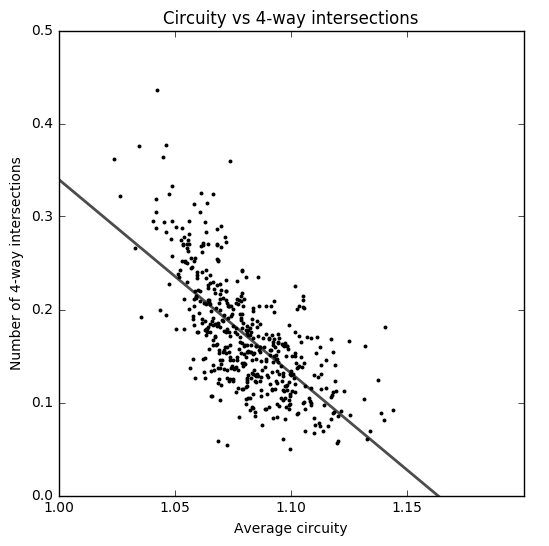

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
x = stats_plot['circuity_avg']
y = stats_plot['int_4_streets_prop']

xlim = (1,1.2)
ylim = (0,0.5)

# regress y on x
results = sm.OLS(y, sm.add_constant(x)).fit()

# calculate estimated y values for regression line
x_line = pd.Series(xlim)
y_est = x_line * results.params[1] + results.params[0]

# draw regression line and scatter plot the points
ax.plot(x_line, y_est, c='k', alpha=0.7, linewidth=2, zorder=1)
ax.scatter(x=x, y=y, c='k', linewidths=0, alpha=1, s=8)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_title('Circuity vs 4-way intersections')
ax.set_xlabel('Average circuity')
ax.set_ylabel('Number of 4-way intersections')

fig.savefig(filename='images/usa-ua-circuity-vs-k4', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
print(results.rsquared)
results.params

0.465958310612


const           2.425131
circuity_avg   -2.085156
dtype: float64